In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [134]:
#1. Check Class Imbalance
df['income'].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

> The outcome variable income is inbalanced and weighted towareds <=50k

In [135]:
#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 
                'sex','race', 'hours-per-week', 'education']

X = pd.get_dummies(df[feature_cols], drop_first=True) # the drop_fist keeps us from multi-colinearity. It removes redundant columns, for example we can infer who is female from the sex_Male column so we remove sex_female
X
X_columns = X.columns.to_list()

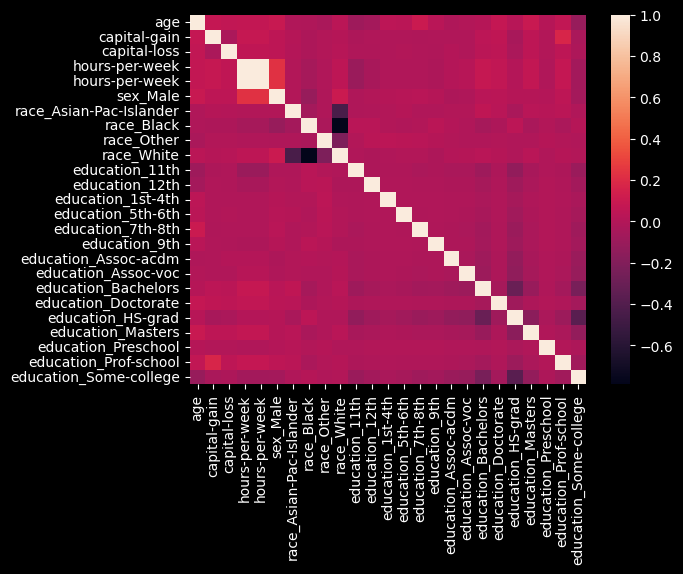

In [136]:
#3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())
plt.show()
plt.close()

In [137]:
#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = np.where(df['income']=='<=50K', 0, 1)

In [138]:
#5a. Split data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

#5b. Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [139]:
#6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
coefficients = log_reg.coef_[0]
print(coefficients)
print('Model Parameters, Coeff:')
intercept = log_reg.intercept_
print(intercept)

Model Parameters, Intercept:
[ 5.39332536e-01  2.23557684e+00  2.62416753e-01  4.01461600e-05
  4.11879315e-01  5.17271050e-01  5.08987094e-02 -2.07856040e-03
 -1.75917853e-03  1.61276078e-01 -8.80255389e-02  0.00000000e+00
 -8.40456965e-02 -8.88136462e-02 -1.37986872e-01 -9.31246542e-02
  2.04538542e-01  2.18050456e-01  6.44777734e-01  2.84587985e-01
  2.00431361e-01  4.68289388e-01 -3.08826762e-01  3.28018080e-01
  3.50844341e-01]
Model Parameters, Coeff:
[-1.40312714]


In [140]:
#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),index=['actual no', 'actual yes'], columns=['predicted no', 'predicted yes'])

print(conf_matrix)

print('Accuracy Score on test set:')

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Confusion Matrix on test set:
            predicted no  predicted yes
actual no           4743            283
actual yes           854            633
Accuracy Score on test set:
0.8254260709350529


In [141]:

print(len(X_columns))
print(len(coefficients))

25
25


In [142]:
#8. Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
data = {'variables': X_columns, 'coefficients': coefficients}
coefficients_df = pd.DataFrame(data)
coefficients_df = coefficients_df.sort_values(by = 'coefficients', ascending=False).reset_index(drop=True)
coefficients_df

,variables,coefficients
0,capital-gain,2.235577
1,education_Bachelors,0.644778
2,age,0.539333
3,sex_Male,0.517271
4,education_Masters,0.468289
5,hours-per-week,0.411879
6,education_Some-college,0.350844
7,education_Prof-school,0.328018
8,education_Doctorate,0.284588
9,capital-loss,0.262417


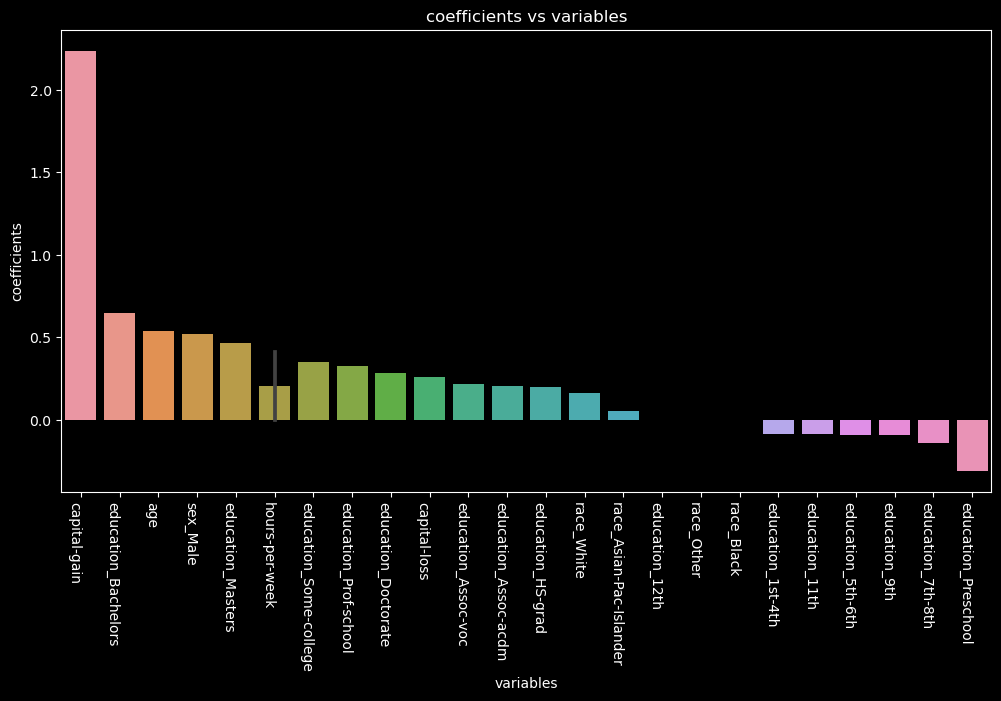

In [143]:
#9. barplot of the coefficients sorted in ascending order
plt.figure(figsize=(12,6))
ax = sns.barplot(data=coefficients_df, x = 'variables', y = 'coefficients')
ax.set_xticklabels(ax.get_xticklabels(), rotation=270, horizontalalignment='right')
plt.title('coefficients vs variables')
plt.show()

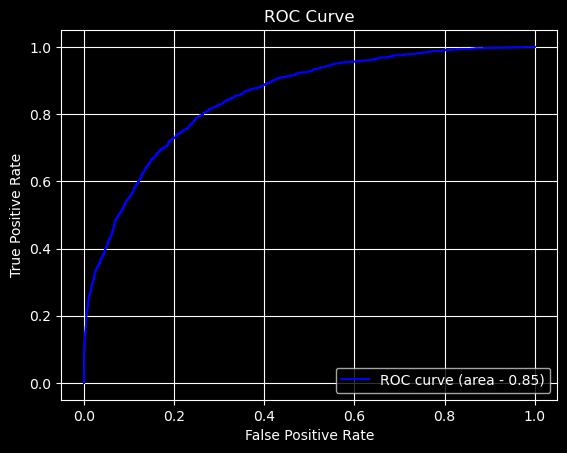

In [144]:
#10. Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area - %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()


age: continuous  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,  Without-pay, Never-worked.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,  
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black  
sex: Female, Male  
capital-gain: continuous  
capital-loss: continuous  
hours-per-week: continuous  
native country: discrete  
income: discrete, >50K, <=50K  